In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
nfl_data = pd.read_csv('Data/nfl_elo.csv')

In [3]:
nfl_data.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2'],
      dtype='object')

In [4]:
data = nfl_data[['date','elo1_pre','elo2_pre','elo_prob1', 'elo_prob2','qbelo1_pre', 'qbelo2_pre',
          'qbelo_prob1', 'qbelo_prob2','score1', 'score2' ]]

In [5]:
test_data = pd.read_csv("https://raw.githubusercontent.com/UBC-MDS/Workflows_Group_306/master/data/current_nfl_elo.csv")

In [6]:
test_data['date'] = pd.to_datetime(test_data['date'])
req_datat = test_data[test_data['date'].dt.year > 1969]
req_datat =  req_datat.drop(columns = 'date')
req_datat

Unnamed: 0  season  neutral playoff team1 team2     elo1_pre  \
0             0    2019        0     NaN   CHI    GB  1588.897931   
1             1    2019        0     NaN   JAX    KC  1455.249073   
2             2    2019        0     NaN   CAR   LAR  1519.378772   
3             3    2019        0     NaN   PHI   WSH  1581.513559   
4             4    2019        0     NaN   MIN   ATL  1538.423954   
..          ...     ...      ...     ...   ...   ...          ...   
262         262    2019        0       d    KC   HOU  1694.572097   
263         263    2019        0       d    GB   SEA  1631.858399   
264         264    2019        0       c    KC   TEN  1707.523977   
265         265    2019        0       c    SF    GB  1651.872498   
266         266    2019        1       s   NaN   NaN          NaN   

        elo2_pre  elo_prob1  elo_prob2  ...  qbelo_prob1  qbelo_prob2  \
0    1455.131370   0.758449   0.241551  ...     0.640182     0.359818   
1    1602.077427   0.384370   0.615630  ...     0.415645     0.584355   
2    1598.015666   0.480385   0.519615  ...     0.475030     0.524970   
3    1441.021792   0.765470   0.234530  ...     0.774390     0.225610   
4    1520.315825   0.617372   0.382628  ...     0.592845     0.407155   
..           ...        ...        ...  ...          ...          ...   
262  1552.346950   0.767256   0.232744  ...     0.826138     0.173862   
263  1579.312894   0.662990   0.337010  ...     0.740069     0.259931   
264  1662.579362   0.653145   0.346855  ...     0.693796     0.306204   
265  1643.322690   0.604293   0.395707  ...     0.638694     0.361306   
266          NaN        NaN        NaN  ...          NaN          NaN   

     qb1_game_value  qb2_game_value qb1_value_post qb2_value_post  \
0        -36.627083       74.729307     153.799734     179.824881   
1         88.354740      433.187480     163.488868     242.949378   
2         49.375757       64.164228     164.522141     145.308064   
3        355.544272      364.289006     200.712701     161.730621   
4        127.861581      210.622686     170.578795     228.546720   
..              ...             ...            ...            ...   
262      438.446627      334.912841     265.006546     208.275675   
263      186.037709      257.002585     171.924286     193.189149   
264             NaN             NaN            NaN            NaN   
265             NaN             NaN            NaN            NaN   
266             NaN             NaN            NaN            NaN   

     qbelo1_post  qbelo2_post  score1  score2  
0    1532.560287  1547.089310     3.0    10.0  
1    1461.728341  1629.568396    26.0    40.0  
2    1500.520997  1603.294491    27.0    30.0  
3    1590.600395  1416.269194    32.0    27.0  
4    1562.098920  1500.092161    28.0    12.0  
..           ...          ...     ...     ...  
262  1703.995494  1548.541903    51.0    31.0  
263  1645.451747  1554.094341    28.0    23.0  
264          NaN          NaN     NaN     NaN  
265          NaN          NaN     NaN     NaN  
266          NaN          NaN     NaN     NaN  

[267 rows x 30 columns]

In [7]:
data['date'] = pd.to_datetime(data['date'])
req_data = data[data['date'].dt.year > 1969]
req_data =  req_data.drop(columns = 'date')
req_data

/home/simardeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


elo1_pre     elo2_pre  elo_prob1  elo_prob2   qbelo1_pre  \
4546   1717.818000  1645.712000   0.687669   0.312331  1702.344322   
4547   1736.523000  1717.341000   0.618831   0.381169  1731.710373   
4548   1735.720000  1748.200000   0.482048   0.517952  1721.362952   
4549   1583.202000  1426.127000   0.782172   0.217828  1575.663197   
4550   1475.119000  1382.173000   0.712839   0.287161  1468.322928   
...            ...          ...        ...        ...          ...   
16536  1694.572097  1552.346950   0.767256   0.232744  1694.568993   
16537  1631.858399  1579.312894   0.662990   0.337010  1636.847937   
16538  1707.523977  1662.579362   0.653145   0.346855          NaN   
16539  1651.872498  1643.322690   0.604293   0.395707          NaN   
16540          NaN          NaN        NaN        NaN          NaN   

        qbelo2_pre  qbelo_prob1  qbelo_prob2  score1  score2  
4546   1644.288163     0.670173     0.329827    27.0     7.0  
4547   1725.882150     0.636747     0.363253     7.0    17.0  
4548   1757.835364     0.452128     0.547872     7.0    23.0  
4549   1419.063694     0.787242     0.212758    34.0    13.0  
4550   1392.110372     0.702241     0.297759    16.0    24.0  
...            ...          ...          ...     ...     ...  
16536  1557.968405     0.826138     0.173862    51.0    31.0  
16537  1562.698151     0.740069     0.259931    28.0    23.0  
16538          NaN     0.693796     0.306204     NaN     NaN  
16539          NaN     0.638694     0.361306     NaN     NaN  
16540          NaN          NaN          NaN     NaN     NaN  

[11995 rows x 10 columns]

In [8]:
req_data['diff_in_score']= req_data['score1']- req_data['score2']


In [9]:
req_datat['diff_in_score']= req_datat['score1']- req_datat['score2']


In [10]:
def f(req_data):
    if req_data['diff_in_score'] == 0:
        val = 'tie'
    elif req_data['diff_in_score'] > 0:
        val = 'winner'
    else:
        val = 'loser'
    return val

In [11]:
req_data['status'] = req_data.apply(f, axis = 1)

In [12]:
req_datat['status'] = req_datat.apply(f, axis = 1)

In [13]:
req_data = req_data.drop(columns = ['score1','score2','diff_in_score'])

In [52]:
req_data = req_data.dropna()
req_data

elo1_pre     elo2_pre  elo_prob1  elo_prob2   qbelo1_pre  \
4546   1717.818000  1645.712000   0.687669   0.312331  1702.344322   
4547   1736.523000  1717.341000   0.618831   0.381169  1731.710373   
4548   1735.720000  1748.200000   0.482048   0.517952  1721.362952   
4549   1583.202000  1426.127000   0.782172   0.217828  1575.663197   
4550   1475.119000  1382.173000   0.712839   0.287161  1468.322928   
...            ...          ...        ...        ...          ...   
16533  1568.475355  1551.178900   0.616268   0.383732  1567.090802   
16534  1629.192628  1626.889910   0.595663   0.404337  1640.378272   
16535  1752.748592  1614.977082   0.762647   0.237353  1725.438914   
16536  1694.572097  1552.346950   0.767256   0.232744  1694.568993   
16537  1631.858399  1579.312894   0.662990   0.337010  1636.847937   

        qbelo2_pre  qbelo_prob1  qbelo_prob2  status  
4546   1644.288163     0.670173     0.329827  winner  
4547   1725.882150     0.636747     0.363253   loser  
4548   1757.835364     0.452128     0.547872   loser  
4549   1419.063694     0.787242     0.212758  winner  
4550   1392.110372     0.702241     0.297759   loser  
...            ...          ...          ...     ...  
16533  1530.153259     0.692983     0.307017   loser  
16534  1618.510694     0.674369     0.325631  winner  
16535  1585.275892     0.869167     0.130833   loser  
16536  1557.968405     0.826138     0.173862  winner  
16537  1562.698151     0.740069     0.259931  winner  

[11992 rows x 9 columns]

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [16]:
X = req_data.drop(columns = 'status')
y = req_data['status']
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, train_size = 0.80)

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,4,6]}
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters)

In [18]:
clf.fit(X_train, y_train)

/home/simardeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/home/simardeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/home/simardeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [74]:
clf.score(X_train, y_train)

0.6608985718753257

In [78]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['Winner', 'Tie', 'Loser'],
                             cmap=plt.cm.Reds, 
                             values_format = 'd')
disp.ax_.set_title('Confusion matrix for NFL predictions')

print('Confusion matrix for NFL predictions')
print(disp.confusion_matrix)

NameError: name 'plot_confusion_matrix' is not defined

In [27]:
y_true = model.predict(X_valid)

In [77]:
pd.DataFrame(confusion_matrix(y_valid, y_true))

0  1    2
0  451  0  529
1    3  0    5
2  572  0  839

In [75]:
clf.score(X_valid, y_valid)

0.6619424760316799

In [13]:
type(req_data[q'date == ']

str

In [ ]:
nfl_data.drop(columns='')

In [4]:
nfl_records = nfl_data[nfl_data['playoff'].isna()]

In [5]:
elo_data = nfl_records[['elo1_pre','elo1_post','score1','score2']]

In [6]:
elo_data.isnull().values.any()

False

In [7]:
elo_data['diff_in_elo']= elo_data['elo1_post']- elo_data['elo1_pre']

/home/simardeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
elo_data['diff_in_score']= elo_data['score1']- elo_data['score2']

/home/simardeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
elo_data

elo1_pre    elo1_post  score1  score2  diff_in_elo  diff_in_score
0      1503.947000  1516.108000    48.0     0.0    12.161000           48.0
1      1493.002000  1515.434000    14.0     0.0    22.432000           14.0
2      1516.108000  1542.135000    45.0     0.0    26.027000           45.0
3      1368.333000  1386.533000    20.0     0.0    18.200000           20.0
4      1504.688000  1516.803000    48.0     0.0    12.115000           48.0
...            ...          ...     ...     ...          ...            ...
16525  1584.215388  1542.091595    14.0    35.0   -42.123793          -21.0
16526  1560.932476  1569.851069    31.0    24.0     8.918593            7.0
16527  1487.042014  1490.985092    16.0    15.0     3.943078            1.0
16528  1744.319584  1752.748592    28.0    10.0     8.429008           18.0
16529  1570.662276  1551.178900    21.0    26.0   -19.483376           -5.0

[15964 rows x 6 columns]

In [10]:
# Creating a column depending on which team wins or loses
elo_data['Status'] = np.where(elo_data['diff_in_score']>0, 'winner', 'loser')

/home/simardeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
elo_data.head()

elo1_pre  elo1_post  score1  score2  diff_in_elo  diff_in_score  Status
0  1503.947   1516.108    48.0     0.0       12.161           48.0  winner
1  1493.002   1515.434    14.0     0.0       22.432           14.0  winner
2  1516.108   1542.135    45.0     0.0       26.027           45.0  winner
3  1368.333   1386.533    20.0     0.0       18.200           20.0  winner
4  1504.688   1516.803    48.0     0.0       12.115           48.0  winner

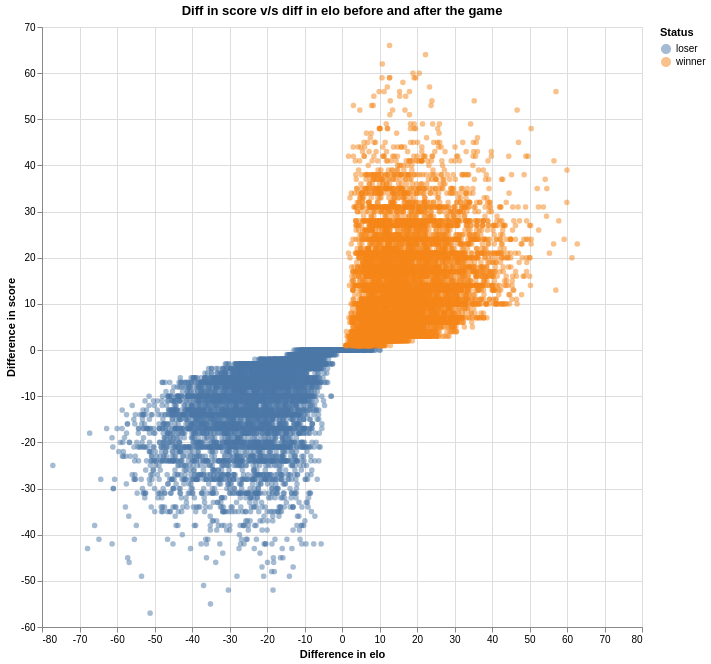

In [12]:
alt.data_transformers.disable_max_rows()

chart = alt.Chart(elo_data).mark_circle(opacity = 0.5).encode(
        alt.X('diff_in_elo:Q', title = 'Difference in elo'),
        alt.Y('diff_in_score:Q', title = 'Difference in score'),
        alt.Color('Status')).properties(
            title = 'Diff in score v/s diff in elo before and after the game',
            height = 600,
            width = 600)

chart

In [13]:
chart.save('img/change_of_elo_with_score.html')